# PISA 2012 Data Exploration
## by Anna Pedroni



From the [PISA Data Visualization Contest](http://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm) webpage:
> PISA is a worldwide study developed by the Organisation for Economic Co-operation and Development (OECD) which examines the skills of 15-year-old school students around the world. The study assesses students’ mathematics, science, and reading skills and contains a wealth of information on students’ background, their school and the organisation of education systems. For most countries, the sample is around 5,000 students, but in some countries the number is even higher. In total, the PISA 2012 dataset contains data on 485 490 pupils.

A detailed description of the methodology of the PISA surveys can be found in the [PISA 2012 Technical Report](http://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf).


## A few points of interest.

### PISA:

- is an age-based survey, assessing 15-year-old students in school in grade 7 or higher. These students are approaching the end of compulsory schooling in most participating countries, and school enrolment at this level is close to universal in almost all OECD countries;
- take a literacy perspective, which focuses on the extent to which students can apply the knowledge and skills they have learned and practised at school when confronted with situations and challenges for which that knowledge may be relevant;
- allows for the assessment of additional cross-curricular competencies [...]. For 2012 a computer-delivered assessment of mathematics and problem solving was added, along with an assessment of financial literacy;
- uses Student Questionnaires to collect information from students on various aspects of their home, family and school background;
- uses School Questionnaires to collect information from schools about various aspects of organisation and educational provision in schools
- uses Parent Questionnaires administered to the parents of the students participating in PISA (in 11 countries for the 2012 survey).

## Focus and Partecipation

PISA 2012, the fifth PISA survey covered **reading, mathematics, science, problem solving and financial literacy** with a primary focus on mathematics.

It was conducted in 34 OECD countries and 31 partner countries/economies.
All 65 countries/economies completed the paper-based tests, with assessments lasting a total of two hours for each student.

An additional 40 minutes were devoted to the computer-based assessment of
- problem solving, in 44 countries/economies;
- mathematics and reading, in 32 countries/economies;
- financial literacy, in 18 countries/economies.

The full list of participants can be found [here](http://www.oecd.org/pisa/aboutpisa/pisa-2012-participants.htm).

Whether they took part in the additional computer-based assessments or not can be found in the [Technical Report](http://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf) at pp.23-24.

### Accordingly to the PISA Technical report, using the data from Student, Parent and School Questionnaires, analyses linking contextual information with student achievement could address:


- differences between countries in the relationships between student-level factors (such as gender and socio-economic background) and achievement;
- differences in the relationships between school-level factors and achievement across countries;
- differences in the proportion of variation in achievement between (rather than within) schools, and differences in this value across countries;
- differences between countries in the extent to which schools moderate or increase the effects of individual-level student factors and student achievement;
- differences in education systems and national context that are related to differences in student achievement across countries; and
- through links to PISA 2000, PISA 2003, PISA 2006 and PISA 2009, changes in any or all of these relationships over time.

## Preliminary Wrangling

The links to 2 files where provided with the [Udacity description of the databases](https://video.udacity-data.com/topher/2019/April/5ca78b26_dataset-project-communicate-data-findings/dataset-project-communicate-data-findings.pdf) for the project:

- PISA Data: pisa2012.csv(.zip) -file with the data about the 485 490 pupils
- PISA Data Dictionary: pisa.dict2012.csv - name of the columns and their description

### Download the data:

In [2]:
# import packages to download files and manage folders
import os
import requests
import zipfile

In [48]:
# create a folder and get the files

folder_name = 'PISA_data'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

urls = ['https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip',
        'https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv']
         
for url in urls:
    response = requests.get(url)
    file_name = url.split('/')[-1]
    with open(os.path.join(folder_name, file_name), mode='wb') as file:
        file.write(response.content)

In [54]:
# unzip the PISA data 

file_name = 'pisa2012.csv.zip'

with zipfile.ZipFile(os.path.join(folder_name, file_name)) as data_zip:
    data_zip.extractall(folder_name)
print('Unzipped')

# remove the .zip file
os.remove(os.path.join(folder_name, file_name))
print('Removed')

Unzipped
Removed


## Import the data and have a look

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### The dictionary of variables

In [2]:
# load the data and have a look
pisa_variables = pd.read_csv('PISA_data\pisadict2012.csv', encoding='latin-1', dtype='unicode')
pisa_variables.head()

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


In [3]:
pisa_variables.shape

(635, 2)

In [4]:
pisa_variables.columns = ['code', 'x']

In [5]:
pisa_variables['x'].values

array(['Country code 3-character',
       'Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)',
       'Stratum ID 7-character (cnt + region ID + original stratum ID)',
       'OECD country', 'National Centre 6-digit Code',
       'School ID 7-digit (region ID + stratum ID + 3-digit school ID)',
       'Student ID', 'International Grade', 'National Study Programme',
       'Birth - Month', 'Birth -Year', 'Gender', 'Attend <ISCED 0>',
       'Age at <ISCED 1>', 'Repeat - <ISCED 1>', 'Repeat - <ISCED 2>',
       'Repeat - <ISCED 3>', 'Truancy - Late for School',
       'Truancy - Skip whole school day',
       'Truancy - Skip classes within school day', 'At Home - Mother',
       'At Home - Father', 'At Home - Brothers', 'At Home - Sisters',
       'At Home - Grandparents', 'At Home - Others',
       'Mother<Highest Schooling>',
       'Mother Qualifications - <ISCED level 6>',
       'Mother Qualifications - <ISCED level 5A>',
       'Mother Qualifi

### The main file: data of the PISA 2012 survey

In [6]:
# load the PISA 2012 survey data (spoiler: it would take a lot! of time on my laptop)
pisa_data = pd.read_csv('PISA_data\pisa2012.csv', encoding='latin-1', dtype='unicode')
pisa_data.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00001,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00002,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00003,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00004,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00005,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [7]:
pisa_data.shape

(485490, 636)

### What is the structure of your dataset?

The main dataset contains 485490 rows, each one representing one student, and 636 columns with coded names.

A second files provide the dictionary for the criptic column names. There we see that each row of the main dataset
- starts with 6 columns about the location of the school attended by the student (e.g. country code, subregion, school ID)
- follows with the sudent ID column and a lot of personal information about the student and their family, their economic situation and experience in school (both emotional and with the school teaching), and a lot more.
- ends with their PLAUSIBLE results at the PISA tests (math and math subscales, science and reading; NO financial literacy) and the weight of the entry within their country, and
- the data on which the entry was created.

### What is/are the main feature(s) of interest in your dataset?

The description given above is a very summary one, and the dataset is truly fascinating for the possibilities of analysis it offers, even if it contains only the results for the main survey (the one used in all the countries).

Sadly, here I need to cut on the information I handle, because of scarcity of resources (time and computer memory). Anyway a detailed analysis is (luckily) not requested.

As said PISA 2012 focussed on mathematics, so in the dataset there are plausible scores about subset of mathematic competencies.

Moreover, Countries that participated in the survey have different languages, but also different cultures and writing systems.
I will select a subset of countries such as their writing system belongs to one of these groups:
  - alphabetic, with a highly phonemic orthography (or shallow orthography): Spanish, Finnish, Italian, German *
  - alphabetic, with a more complex relationship between orthography and pronunciation, a deeper orthography: English, French, Arabic *
  - logographic: Chinese, Japanese ([Korean](https://en.wikipedia.org/wiki/Korean_language#Writing_system), but keeping in mind that Korean logograms, still studied in school, as been long replaced in use by Korean alphabet) *


\* *I wanted to make the distinction between languages "that are written how they are pronunced", languages "that you cannot guess how a word is written just by hearing it" and languages that use ideograms... [Wikipedia](https://en.wikipedia.org/wiki/Writing_system) and the article [Getting to the bottom of orthographic depth](https://link.springer.com/article/10.3758/s13423-015-0835-2#Sec7) helped me putting things down a little more precisely.*


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will keep for sure the mathematic and reading scores, as well as the language(s) spoken by the students and the language in which the test was administered (*TESTLANG* is the column heading).

Since the mathematic scores have subcategories, it would probably be interesting to have a look at them separately.

*(More about the scores and proficiency levels in the next cells)*

There is a wealth of information about the students' background as well, and it seems like a good idea to see if there are influential factors there, for instance the *index of economic, social and cultural status (column "ESCS" in the dataset)*; but to really understand what information I have that should be used, I first need to trim the database and explore it better.

### Proficiency levels

In the [Technical Report](http://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf) (from p.296 on) it is possible to find the scales used to record the proficiency for the different areas:

- Mathematics: >1, 1, 2, 3, 4, 5, 6 (highest level) *

- Reading and Science: I couldn't find the scales in the document. There is, however, indicated that the scales are just one for each discipline and are respectively the same as 2009 and 2006.
  - Reading: 1a, 1b, 2, 3, 4, 5, 6 (highest level)
  - Science: 1, 2, 3, 4, 5, 6 (highest level)

All this proficiency levels are provided with a description of the competencies associated with them.

(problem solving and financial literacy are also described, but the relative plausible scores are not in the dataset)

*NB. this is the main scale for mathematics, and also for all the subscales of different competencies tested (e.g.: "formulating situations mathematically", "employing mathematical concepts, facts, ...")

### However, the results are not given by those scales!

We only have PLAUSIBLE VALUES:
From the Technical report:
>Plausible values

>As with all item response scaling models, student proficiencies (or measures) are not observed; they are missing data
that must be inferred from the observed item responses. There are several possible alternative approaches for making
this inference. PISA uses the imputation methodology usually referred to as plausible values (PVs). PVs are a selection of
likely proficiencies for students that attained each score. For each scale and subscale, five plausible values per student
are included in the international database.
Using item parameters anchored at their estimated values from the international calibration, the plausible values are
random draws from the marginal posterior of the latent distribution for each student. 

### About the plausible scales (p.156):

> Sixty-five plausible values, five for each of the 13 PISA 2012 scales are included in the PISA 2012 database. PV1MATH
to PV5MATH are for mathematical literacy; PV1SCIE to PV5SCIE for scientific literacy, PV1READ to PV5READ for
reading literacy, PV1CPRO to PV5CPRO for computer problem solving assessment, PV1CMAT to PV5CMAT for the
computer-based mathematics assessment and PV1CREA to PV5CREA for digital reading assessment. For the four
mathematics content subscales, change and relationships, quantity, space and shape, uncertainty and data, the plausible
values variables are PV1MACC to PV5MACC, PV1MACQ to PV5MACQ, PV1MACS to PV5MACS, and PV1MACU to
PV5MACU respectively. For the three mathematics process subscales employ, formulate and interpret, the plausible
values variables are PV1MAPE to PV5MAPE, PV1MAPF to PV5MAPF, and PV1MAPI to PV5MAPI respectively

### My understanding about these evil PLAUSIBLE SCORES

Reading through the Technical report, I've come up with this layman explanation:

For every student, for every scale and subscale, the results of the tests have been taken and used to compute 5 plausible results that student could have reached if they had taken all the PISA tests, not only the subset contained in the booklet they tackled.
This has been done for accuracy in later estimating the parameters of the population (all the students of a Country). Accuracy of those parameters is also the reason it would be better to use the weight of each student and also to repeat the calculations 5 times per scale (one for each plausible score column).

The plausible score is given in a scale that can be converted to the relative proficiency level according to the bands provided in the Technical report<a id='conversions'></a>:

##### Main mathematical literacy levels and subscales as well - p. 297 of the Technical report
Level : Score points on the PISA scale
- 6 : Above 669.3
- 5 : From 607.0 to less than 669.3
- 4 : From 544.7 to less than 607.0
- 3 : From 482.4 to less than 544.7
- 2 : From 420.1 to less than 482.4
- 1 : From 357.8 to less than 420.1
- Below level 1 : Below 357.8


##### Reading literacy performance band definitions on the PISA scale - p. 265 of the [PISA 2009 Technical report](https://www.oecd-ilibrary.org/docserver/9789264167872-en.pdf?expires=1587756729&id=id&accname=guest&checksum=3C4CAAFFDA33331CACE78A9B3A852FA5)
Level : Score points on the PISA scale
- 6 : Higher than 698.32
- 5 : Higher than 625.61 and less than or equal to 698.32
- 4 : Higher than 552.89 and less than or equal to 625.61
- 3 : Higher than 480.18 and less than or equal to 552.89
- 2 : Higher than 407.47 and less than or equal to 480.18
- 1a : Higher than 334.75 and less than or equal to 407.47
- 1b : 262.04 to less than or equal to 334.75


##### Scientific literacy performance band definitions on the PISA scale - p. 293 of the [PISA 2006 Technical report](https://www.oecd.org/pisa/data/42025182.pdf)
Level : Score points on the PISA scale
- 6 : Above 707.9
- 5 : 633.3 to 707.9
- 4 : 558.7 to 633.3
- 3 : 484.1 to 558.7
- 2 : 409.5 to 484.1
- 1 : 334.9 to 409.5

### About the weights

Every row/student has a weight (more than one, to be precise, but..).

The reason for it resides, if I got it right, in the sampling process of subregions, schools and students done in every Country and the reason to use it (them) is, in the end, to better represent the country parameters.

I'm planning to regroup the students by different parameters (primary first language = language at school = language of the PISA test), so they won't be divided by Country and won't rapresent country level proficiency.

Therefore I think it would be wrong to use the weights within this project.

# More Wrangling


## Finish Gathering 

As said, I will keep only the data about the countries speaking one or more of these lenguages: Spanish, Finnish, Italian, German, English, French, Arabic, Chinese, and Japanese.

The countries in the database are:

In [8]:
# find the list of countries contained
pisa_data.CNT.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

By the way, these are the full names, not the 3 character Country codes as indicated by the data dictionary.. which is good, because it is easier for me to check on the Wikipedia pages the spoken languages, for the countries I have doubts about.

I'm a bit puzzled by the presence of United States of America and, separately, Florida, Connecticut and Massachusetts. Assuming that all the data included in the dataset are valid (the survey data have been revised several times, if we believe the Technical report -and we have to) the reason is possibly to be find in the sampling choices and volunteering of schools to conduct the survey. Provided there are no duplicates, it is no worries to me.

I will keep these 37 Countries/economies:
'United Arab Emirates', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Germany', 'Spain', 'Finland', 'France', 'United Kingdom', 'Hong Kong-China', 'Ireland', 'Italy', 'Japan', 'Korea', 'Liechtenstein', 'Luxembourg', 'Macao-China', 'Mexico', 'New Zealand', 'Peru', 'Qatar', 'China-Shanghai', 'Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)', 'Singapore', 'Chinese Taipei', 'Tunisia', 'Uruguay', 'United States of America', 'Vietnam'

In [9]:
# list of Countries to keep
to_keep = ['United Arab Emirates', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Germany', 'Spain', 'Finland', 'France', 'United Kingdom', 'Hong Kong-China', 'Ireland', 'Italy', 'Japan', 'Korea', 'Liechtenstein', 'Luxembourg', 'Macao-China', 'Mexico', 'New Zealand', 'Peru', 'Qatar', 'China-Shanghai', 'Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)', 'Singapore', 'Chinese Taipei', 'Tunisia', 'Uruguay', 'United States of America', 'Vietnam']


# select only the desired Countries:
# reusing the df name in order not to use up too much memory
pisa_data = pisa_data.loc[pisa_data.CNT.isin(to_keep)]

# clean memory from trial results (answer "y" to prompt)
%reset Out

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (6 entries)


In [10]:
pisa_data.shape

(314831, 636)

We had 485490 rows, now they are **314831** (we dismissed roughly 35% of the rows).

Time to eliminate some of the columns. I'm not ready to dismiss most of the columns, even if at the end I will use only a few of the 636 that are in the dataset.

I'm quite confident in dismissing the following two chunks though (I'm not bothering with picking up single columns):

 - from : *EC04Q01A	Acquired skills - Find job info - Yes, at school*
 
 to: *EC04Q06C	Acquired skills - Student financing - No, never*

 
 - from: *W_FSTR1	FINAL STUDENT REPLICATE BRR-FAY WEIGHT1*
 
 to: *VAR_UNIT	RANDOMLY ASSIGNED VARIANCE UNIT*


In [11]:
# delete the columns listed above
pisa_data.drop(pisa_data.loc[:, 'EC04Q01A':'EC04Q06C'].columns, axis=1, inplace=True)
pisa_data.drop(pisa_data.loc[:, 'W_FSTR1':'VAR_UNIT'].columns, axis=1, inplace=True)
# since I'm doing this, I'll drop also the first, unnamed, column
pisa_data.drop(pisa_data.iloc[:,0:1].columns, axis=1, inplace=True)

In [12]:
# looking a bit better?
pisa_data.shape

(314831, 535)

From 636 columns to 535: probably still 510-520 useless columns, but 101 column better.

I'll save my subset of the database as it is now, so that if needed, I can restart running the cells from the last one before the next section, "Select variables".

In [14]:
pisa_data.dtypes

CNT           object
SUBNATIO      object
STRATUM       object
OECD          object
NC            object
               ...  
PV4SCIE       object
PV5SCIE       object
W_FSTUWT      object
SENWGT_STU    object
VER_STU       object
Length: 535, dtype: object

In [15]:
# save the dataset, keep ',' as separator, keep 'utf8' as encoding
pisa_data.to_csv('PISA_data\selected_countries_subset.csv', index=False, encoding='latin-1')
print('Saved')

Saved


In [22]:
# clean a bit of memory
pisa_data = ''
%reset Out

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (9 entries)


In [444]:
# in the case I need to restart the kernel or the computer
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# reload the dictionary
pisa_variables = pd.read_csv('PISA_data\pisadict2012.csv', encoding='latin-1', dtype='unicode')
pisa_variables.columns = ['code', 'x']


# load my selected Countries data
pisa_subset = pd.read_csv('PISA_data\selected_countries_subset.csv', encoding='latin-1', dtype='unicode')
#have a look
pisa_subset.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT,SENWGT_STU,VER_STU
0,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,0000001,00001,10,1,08,...,310.3345,241.3672,397.2771,387.9523,375.8299,365.5725,351.5852,2.8838,0.071,22NOV13
1,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,0000001,00002,10,1,06,...,198.2226,243.1315,301.5106,267.0086,315.4979,289.3883,305.2406,2.8838,0.071,22NOV13
2,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,0000001,00003,10,1,09,...,251.0707,322.4439,293.771,278.8512,200.5222,234.0918,327.3405,2.8838,0.071,22NOV13
3,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,0000001,00004,9,1,12,...,214.1813,252.6746,329.2055,298.4334,281.6486,319.8806,318.9482,2.8838,0.071,22NOV13
4,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,0000001,00005,10,1,03,...,301.6735,249.547,378.1611,405.2033,389.351,408.0007,410.7982,2.8838,0.071,22NOV13


### Select variables

In [445]:
pisa_subset.shape

(314831, 535)

In [446]:
pisa_subset.CNT.count()

314831

pisa_variables that look interesting:

- 'Country code 3-character',
- 'OECD country',
- 'Student ID', **NB: it starts from 1 for every Country, it needs to be coupled with the Country variable to be unique**
- 'Gender',
- 'Mother<Highest Schooling>',
- 'Mother Current Job Status',
- 'Father<Highest Schooling>',
- 'Father Current Job Status',
- 'Highest educational level of parents',
- 'Country of Birth International - Self',
- 'First language learned',
- 'Age started learning <test language>',
- 'Language of the test',
- 'Language spoken - Mother',
- 'Language spoken - Father',
- 'Standard or simplified set of booklets',
- 'Attitude towards School: Learning Outcomes',
- 'Attitude towards School: Learning Activities',
- 'Sense of Belonging to School',
- "Mathematics Teacher's Classroom Management",
- 'Cognitive Activation in Mathematics Lessons',
- 'Instrumental Motivation for Mathematics',
- 'Mathematics Interest',
- 'Mathematics Work Ethic',
- "Mathematics Teacher's Support",
- 'Mathematics Self-Concept',
- 'Teacher Student Relations',
- 'Subjective Norms in Mathematics',
- 'Index of economic, social and cultural status',
- 'Home educational resources',
- 'Preference for Heritage Language in Conversations with Family and Friends',
- 'Language at home (3-digit code)',
- 'International Language at Home',
- 'Preference for Heritage Language in Language Reception and Production',
- 'Plausible value 1 in mathematics',
- 'Plausible value 2 in mathematics',
- 'Plausible value 3 in mathematics',
- 'Plausible value 4 in mathematics',
- 'Plausible value 5 in mathematics',
- 'Plausible value 1 in content subscale of math - Change and Relationships',
- 'Plausible value 2 in content subscale of math - Change and Relationships',
- 'Plausible value 3 in content subscale of math - Change and Relationships',
- 'Plausible value 4 in content subscale of math - Change and Relationships',
- 'Plausible value 5 in content subscale of math - Change and Relationships',
- 'Plausible value 1 in content subscale of math - Quantity',
- 'Plausible value 2 in content subscale of math - Quantity',
- 'Plausible value 3 in content subscale of math - Quantity',
- 'Plausible value 4 in content subscale of math - Quantity',
- 'Plausible value 5 in content subscale of math - Quantity',
- 'Plausible value 1 in content subscale of math - Space and Shape',
- 'Plausible value 2 in content subscale of math - Space and Shape',
- 'Plausible value 3 in content subscale of math - Space and Shape',
- 'Plausible value 4 in content subscale of math - Space and Shape',
- 'Plausible value 5 in content subscale of math - Space and Shape',
- 'Plausible value 1 in content subscale of math - Uncertainty and Data',
- 'Plausible value 2 in content subscale of math - Uncertainty and Data',
- 'Plausible value 3 in content subscale of math - Uncertainty and Data',
- 'Plausible value 4 in content subscale of math - Uncertainty and Data',
- 'Plausible value 5 in content subscale of math - Uncertainty and Data',
- 'Plausible value 1 in process subscale of math - Employ',
- 'Plausible value 2 in process subscale of math - Employ',
- 'Plausible value 3 in process subscale of math - Employ',
- 'Plausible value 4 in process subscale of math - Employ',
- 'Plausible value 5 in process subscale of math - Employ',
- 'Plausible value 1 in process subscale of math - Formulate',
- 'Plausible value 2 in process subscale of math - Formulate',
- 'Plausible value 3 in process subscale of math - Formulate',
- 'Plausible value 4 in process subscale of math - Formulate',
- 'Plausible value 5 in process subscale of math - Formulate',
- 'Plausible value 1 in process subscale of math - Interpret',
- 'Plausible value 2 in process subscale of math - Interpret',
- 'Plausible value 3 in process subscale of math - Interpret',
- 'Plausible value 4 in process subscale of math - Interpret',
- 'Plausible value 5 in process subscale of math - Interpret',
- 'Plausible value 1 in reading',
- 'Plausible value 2 in reading',
- 'Plausible value 3 in reading',
- 'Plausible value 4 in reading',
- 'Plausible value 5 in reading',
- 'Plausible value 1 in science',
- 'Plausible value 2 in science',
- 'Plausible value 3 in science',
- 'Plausible value 4 in science',
- 'Plausible value 5 in science'

#### There would be more, but already like this they are more than I will use.


In [447]:
descriptions = ['Country code 3-character',
                'OECD country',
                'Student ID',
                'Gender',
                'Mother<Highest Schooling>',
                'Mother Current Job Status',
                'Father<Highest Schooling>',
                'Father Current Job Status',
                'Highest educational level of parents',
                'Country of Birth International - Self',
                'First language learned',
                'Age started learning <test language>',
                'Language of the test',
                'Language spoken - Mother',
                'Language spoken - Father',
                'Standard or simplified set of booklets',
                'Attitude towards School: Learning Outcomes',
                'Attitude towards School: Learning Activities',
                'Sense of Belonging to School',
                "Mathematics Teacher's Classroom Management",
                'Cognitive Activation in Mathematics Lessons',
                'Instrumental Motivation for Mathematics',
                'Mathematics Interest',
                'Mathematics Work Ethic',
                "Mathematics Teacher's Support",
                'Mathematics Self-Concept',
                'Teacher Student Relations',
                'Subjective Norms in Mathematics',
                'Index of economic, social and cultural status',
                'Home educational resources',
                'Preference for Heritage Language in Conversations with Family and Friends',
                'Language at home (3-digit code)',
                'International Language at Home',
                'Preference for Heritage Language in Language Reception and Production',
                'Plausible value 1 in mathematics',
                'Plausible value 2 in mathematics',
                'Plausible value 3 in mathematics',
                'Plausible value 4 in mathematics',
                'Plausible value 5 in mathematics',
                'Plausible value 1 in content subscale of math - Change and Relationships',
                'Plausible value 2 in content subscale of math - Change and Relationships',
                'Plausible value 3 in content subscale of math - Change and Relationships',
                'Plausible value 4 in content subscale of math - Change and Relationships',
                'Plausible value 5 in content subscale of math - Change and Relationships',
                'Plausible value 1 in content subscale of math - Quantity',
                'Plausible value 2 in content subscale of math - Quantity',
                'Plausible value 3 in content subscale of math - Quantity',
                'Plausible value 4 in content subscale of math - Quantity',
                'Plausible value 5 in content subscale of math - Quantity',
                'Plausible value 1 in content subscale of math - Space and Shape',
                'Plausible value 2 in content subscale of math - Space and Shape',
                'Plausible value 3 in content subscale of math - Space and Shape',
                'Plausible value 4 in content subscale of math - Space and Shape',
                'Plausible value 5 in content subscale of math - Space and Shape',
                'Plausible value 1 in content subscale of math - Uncertainty and Data',
                'Plausible value 2 in content subscale of math - Uncertainty and Data',
                'Plausible value 3 in content subscale of math - Uncertainty and Data',
                'Plausible value 4 in content subscale of math - Uncertainty and Data',
                'Plausible value 5 in content subscale of math - Uncertainty and Data',
                'Plausible value 1 in process subscale of math - Employ',
                'Plausible value 2 in process subscale of math - Employ',
                'Plausible value 3 in process subscale of math - Employ',
                'Plausible value 4 in process subscale of math - Employ',
                'Plausible value 5 in process subscale of math - Employ',
                'Plausible value 1 in process subscale of math - Formulate',
                'Plausible value 2 in process subscale of math - Formulate',
                'Plausible value 3 in process subscale of math - Formulate',
                'Plausible value 4 in process subscale of math - Formulate',
                'Plausible value 5 in process subscale of math - Formulate',
                'Plausible value 1 in process subscale of math - Interpret',
                'Plausible value 2 in process subscale of math - Interpret',
                'Plausible value 3 in process subscale of math - Interpret',
                'Plausible value 4 in process subscale of math - Interpret',
                'Plausible value 5 in process subscale of math - Interpret',
                'Plausible value 1 in reading',
                'Plausible value 2 in reading',
                'Plausible value 3 in reading',
                'Plausible value 4 in reading',
                'Plausible value 5 in reading',
                'Plausible value 1 in science',
                'Plausible value 2 in science',
                'Plausible value 3 in science',
                'Plausible value 4 in science',
                'Plausible value 5 in science']

In [448]:
#get the column names
columns_to_keep = pisa_variables[pisa_variables['x'].isin(descriptions)]['code'].tolist()

In [449]:
pisa_chosen_var = pisa_subset[columns_to_keep]

In [450]:
pisa_chosen_var

,CNT,OECD,STIDSTD,ST04Q01,ST13Q01,ST15Q01,ST17Q01,ST19Q01,ST20Q01,ST25Q01,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,United Arab Emirates,Non-OECD,00001,Male,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,Working full-time <for pay>,Other country,Language of the test,...,313.5423,309.5325,267.0294,310.3345,241.3672,397.2771,387.9523,375.8299,365.5725,351.5852
1,United Arab Emirates,Non-OECD,00002,Male,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,"Not working, but looking for a job",Country of test,Language of the test,...,269.5957,146.0961,261.5762,198.2226,243.1315,301.5106,267.0086,315.4979,289.3883,305.2406
2,United Arab Emirates,Non-OECD,00003,Male,NaN,"Other (e.g. home duties, retired)",<ISCED level 2>,Working part-time <for pay>,Country of test,Language of the test,...,267.9116,257.4863,226.2104,251.0707,322.4439,293.771,278.8512,200.5222,234.0918,327.3405
3,United Arab Emirates,Non-OECD,00004,Male,<ISCED level 3A>,"Other (e.g. home duties, retired)",NaN,Working full-time <for pay>,Other country,Language of the test,...,217.389,178.8957,183.7074,214.1813,252.6746,329.2055,298.4334,281.6486,319.8806,318.9482
4,United Arab Emirates,Non-OECD,00005,Male,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,"Other (e.g. home duties, retired)",Country of test,Language of the test,...,279.219,303.2774,285.6346,301.6735,249.547,378.1611,405.2033,389.351,408.0007,410.7982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314826,Vietnam,Non-OECD,04955,Female,<ISCED level 2>,"Other (e.g. home duties, retired)",He did not complete <ISCED level 1>,"Other (e.g. home duties, retired)",Country of test,Language of the test,...,460.2272,476.1134,472.9362,472.1419,481.6736,559.8098,528.1052,519.7128,535.5651,538.3626
314827,Vietnam,Non-OECD,04956,Male,She did not complete <ISCED level 1>,"Other (e.g. home duties, retired)",<ISCED level 2>,"Other (e.g. home duties, retired)",Country of test,Language of the test,...,490.9325,479.7053,448.4294,565.5134,451.6372,538.7355,493.9761,493.0436,561.1153,535.0056
314828,Vietnam,Non-OECD,04957,Male,<ISCED level 1>,Working full-time <for pay>,<ISCED level 2>,Working full-time <for pay>,Country of test,Language of the test,...,462.6239,514.7503,434.5558,457.8122,511.5425,536.8706,571.3726,488.3812,548.9929,563.9127
314829,Vietnam,Non-OECD,04958,Male,<ISCED level 2>,"Other (e.g. home duties, retired)",<ISCED level 3A>,"Other (e.g. home duties, retired)",Country of test,Language of the test,...,505.2873,522.1282,513.3068,528.5437,522.9301,511.0407,532.4879,524.0955,551.1376,514.7706


## Assess, Clean and Test

In [451]:
pisa_chosen_var.shape

(314831, 84)

In [452]:
pisa_chosen_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314831 entries, 0 to 314830
Data columns (total 84 columns):
CNT         314831 non-null object
OECD        314831 non-null object
STIDSTD     314831 non-null object
ST04Q01     314831 non-null object
ST13Q01     295559 non-null object
ST15Q01     303438 non-null object
ST17Q01     285911 non-null object
ST19Q01     293592 non-null object
ST20Q01     308622 non-null object
ST25Q01     300461 non-null object
EC05Q01     95301 non-null object
EC06Q01     30918 non-null object
EC07Q01     30299 non-null object
EC07Q02     29819 non-null object
EASY        314831 non-null object
ATSCHL      202601 non-null object
ATTLNACT    202093 non-null object
BELONG      203134 non-null object
CLSMAN      202822 non-null object
COGACT      204216 non-null object
ESCS        309909 non-null object
HEDRES      309882 non-null object
HISCED      305922 non-null object
INSTMOT     205531 non-null object
INTMAT      205712 non-null object
LANGCOMM    30540 

### ISSUES:

##### Missing data: a lot
It is not data that I can retrieve somewhere, therefore, after a bit of cleaning I will assess the columns I want to use and decide what to do.

##### Tidiness
The dataset looks OK.
Anyway, I still have more variables than I will use, I will cut on them later, after exploring a little.

##### Quality
- columns name need to be more informative
- all variables are string, it is not correct. Some are strings, other are int or float and other are categories. It will be easier to decide which one to convert after changing the column names.
- plausible values: need to be converted in plausible levels ([here some info](#conversions)), reported in the next cell

#### I'll fix these quality issue and then look for more

> #### Test values conversion bands
> 
> ##### Main mathematical literacy levels and subscales as well 
> Level : Score points on the PISA scale
> - 6 : value >= 669.3
> - 5 : 607.0 <= value < 669.3
> - 4 : 544.7 <= value < 607.0
> - 3 : 482.4 <= value < 544.7
> - 2 : 420.1 <= value < 482.4
> - 1 : 357.8 <= value < 420.1
> - Below 1 : value < 357.8
> 
> 
> ##### Reading literacy performance band definitions on the PISA scale
> Level : Score points on the PISA scale
> - 6 : value > 698.32
> - 5 : 625.61 < value <= 698.32
> - 4 : 552.89 < value <= 625.61
> - 3 : 480.18 < value <= 552.89
> - 2 : 407.47 < value <= 480.18
> - 1a : 334.75 < value <= 407.47
> - 1b : 262.04 < value <= 334.75
> 
> 
> ##### Scientific literacy performance band definitions on the PISA scale 
> Level : Score points on the PISA scale
> - 6 : value > 707.9
> - 5 : 633.3 < value <= 707.9
> - 4 : 558.7 < value <= 633.3
> - 3 : 484.1 < value <= 558.7
> - 2 : 409.5 < value <= 484.1
> - 1 : 334.9 < value <= 409.5
> (for this one there was no indication of where the bounds were included, I decided to align it with the reading scale)

#### Make a copy of the dataset

In [644]:
# make a copy
df = pisa_chosen_var.copy() # sorry, but df is a convenient name
print('Done!')

Done!


#### I'll deal first with the plausible value columns (both conversion to level and levels to categories)

The column names (from Excel) are:

mathematics

'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 
'PV1MACC', 'PV2MACC', 'PV3MACC', 'PV4MACC', 'PV5MACC', 
'PV1MACQ', 'PV2MACQ', 'PV3MACQ', 'PV4MACQ', 'PV5MACQ',
'PV1MACS', 'PV2MACS', 'PV3MACS', 'PV4MACS', 'PV5MACS',
'PV1MACU', 'PV2MACU', 'PV3MACU', 'PV4MACU', 'PV5MACU',
'PV1MAPE', 'PV2MAPE', 'PV3MAPE', 'PV4MAPE', 'PV5MAPE',
'PV1MAPF', 'PV2MAPF', 'PV3MAPF', 'PV4MAPF', 'PV5MAPF',
'PV1MAPI', 'PV2MAPI', 'PV3MAPI', 'PV4MAPI', 'PV5MAPI'

reading

'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ'

science

'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'


In [645]:
# collect the column names:
mathematics = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH',
               'PV1MACC', 'PV2MACC', 'PV3MACC', 'PV4MACC', 'PV5MACC',
               'PV1MACQ', 'PV2MACQ', 'PV3MACQ', 'PV4MACQ', 'PV5MACQ',
               'PV1MACS', 'PV2MACS', 'PV3MACS', 'PV4MACS', 'PV5MACS',
               'PV1MACU', 'PV2MACU', 'PV3MACU', 'PV4MACU', 'PV5MACU',
               'PV1MAPE', 'PV2MAPE', 'PV3MAPE', 'PV4MAPE', 'PV5MAPE',
               'PV1MAPF', 'PV2MAPF', 'PV3MAPF', 'PV4MAPF', 'PV5MAPF',
               'PV1MAPI', 'PV2MAPI', 'PV3MAPI', 'PV4MAPI', 'PV5MAPI']

reading = ['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']

science = ['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']

In [646]:
# convert the columns from strings to float
all_PV = mathematics + reading + science

for col in all_PV:
    df[col] = df[col].astype('float')
    
print('Done!')

Done!


In [647]:
# verify dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314831 entries, 0 to 314830
Data columns (total 84 columns):
CNT         314831 non-null object
OECD        314831 non-null object
STIDSTD     314831 non-null object
ST04Q01     314831 non-null object
ST13Q01     295559 non-null object
ST15Q01     303438 non-null object
ST17Q01     285911 non-null object
ST19Q01     293592 non-null object
ST20Q01     308622 non-null object
ST25Q01     300461 non-null object
EC05Q01     95301 non-null object
EC06Q01     30918 non-null object
EC07Q01     30299 non-null object
EC07Q02     29819 non-null object
EASY        314831 non-null object
ATSCHL      202601 non-null object
ATTLNACT    202093 non-null object
BELONG      203134 non-null object
CLSMAN      202822 non-null object
COGACT      204216 non-null object
ESCS        309909 non-null object
HEDRES      309882 non-null object
HISCED      305922 non-null object
INSTMOT     205531 non-null object
INTMAT      205712 non-null object
LANGCOMM    30540 

In [648]:
# convert the values for mathematics and turn into categories

# define conversion function
def conversion_math (x):
    if x == np.nan:
        return x
    if x >= 669.3:
        return '6'
    if 607.0 <= x < 669.3:
        return '5'
    if 544.7 <= x < 607.0:
        return '4'
    if 482.4 <= x < 544.7:
        return '3'
    if 420.1 <= x < 482.4:
        return '2'
    if 357.8 <= x < 420.1:
        return '1'
    if x < 357.8:
        return 'Below 1'

# create the categories
values_math = ['Below 1', '1', '2', '3', '4', '5', '6']
ordered_math = pd.api.types.CategoricalDtype(ordered=True, categories=values_math)

print('Working on this..')

# apply
for col in mathematics:
    df[col] = df[col].apply(conversion_math)
    df[col] = df[col].astype(ordered_math)

print('Done!')

Working on this..
Done!


In [649]:
# convert the values for reading and turn into categories

# define conversion function
def conversion_reading (x):
    if x == np.nan:
        return x
    if x > 698.32:
        return '6'
    if 625.61 < x <= 698.32:
        return '5'
    if 552.89 < x <= 625.61:
        return '4'
    if 480.18 < x <= 552.89:
        return '3'
    if 407.47 < x <= 480.18:
        return '2'
    if 334.75 < x <= 407.47:
        return '1a'
    if 262.04 < x <= 334.75:
        return '1b'
    if x <= 262.04:
        return 'Too low' # my addition, to not leave values uncategorized

    
# create the categories
values_reading = ['Too low', '1b', '1a', '2', '3', '4', '5', '6']
ordered_reading = pd.api.types.CategoricalDtype(ordered=True, categories=values_reading)

print('Working on this..')

# apply
for col in reading:
    df[col] = df[col].apply(conversion_reading)
    df[col] = df[col].astype(ordered_reading)

print('Done!')

Working on this..
Done!


In [650]:
# convert the values for science and turn into categories

# define conversion function
def conversion_science (x):
    if x == np.nan:
        return x
    if x > 707.9:
        return '6'
    if 633.3 < x <= 707.9:
        return '5'
    if 558.7 < x <= 633.3:
        return '4'
    if 484.1 < x <= 558.7:
        return '3'
    if 409.5 < x <= 484.1:
        return '2'
    if 334.9 < x <= 409.5:
        return '1'
    if x <= 334.9:
        return 'Too low' # my addition, to not leave values uncategorized
    
# create the categories
values_science = ['Too low', '1', '2', '3', '4', '5', '6']
ordered_science = pd.api.types.CategoricalDtype(ordered=True, categories=values_science)

print('Working on this..')

# apply
for col in science:
    df[col] = df[col].apply(conversion_science)
    df[col] = df[col].astype(ordered_science)
    
print('Done!')

Working on this..
Done!


In [651]:
df[['PV3MATH', 'PV1READ', 'PV4SCIE']]

,PV3MATH,PV1READ,PV4SCIE
0,Below 1,1b,1
1,Below 1,1b,Too low
2,Below 1,1b,Too low
3,Below 1,Too low,Too low
4,Below 1,1b,1
...,...,...,...
314826,2,2,3
314827,3,3,4
314828,3,2,3
314829,3,3,3


In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314831 entries, 0 to 314830
Data columns (total 84 columns):
CNT         314831 non-null object
OECD        314831 non-null object
STIDSTD     314831 non-null object
ST04Q01     314831 non-null object
ST13Q01     295559 non-null object
ST15Q01     303438 non-null object
ST17Q01     285911 non-null object
ST19Q01     293592 non-null object
ST20Q01     308622 non-null object
ST25Q01     300461 non-null object
EC05Q01     95301 non-null object
EC06Q01     30918 non-null object
EC07Q01     30299 non-null object
EC07Q02     29819 non-null object
EASY        314831 non-null object
ATSCHL      202601 non-null object
ATTLNACT    202093 non-null object
BELONG      203134 non-null object
CLSMAN      202822 non-null object
COGACT      204216 non-null object
ESCS        309909 non-null object
HEDRES      309882 non-null object
HISCED      305922 non-null object
INSTMOT     205531 non-null object
INTMAT      205712 non-null object
LANGCOMM    30540 

#### Column names

In [653]:
# all my chosen column descriptions are in the var description, the name are in the var columns_to_keep
# unfortunately I cannot zip them, because the order is not the same

# create a subset of pisa_variables
my_columns = pisa_variables[pisa_variables['code'].isin(columns_to_keep)].copy()


In [654]:
# clean the descriptions a little bit
# sorry for the superlong lines, but .replace() was not working and I decided to look for the reason at a later moment
my_columns['x'] = my_columns.x.str.replace(' - ', '_').str.replace(' ','_').str.replace("'s",'').str.replace('-','_').str.replace('<','_').str.replace('>','').str.replace(',','').str.replace('__','_')
my_columns['x'] = my_columns.x.str.replace('_value_', '_level_').str.replace('content_subscale_of_','').str.replace('process_subscale_of_','').str.replace('_code_3_character', '').str.replace('_.3_digit_code.', '')

In [655]:
# create a dictionary of the current column names and the cleaned descriptions, set the latter as new names
columns_dict = dict(zip(my_columns['code'], my_columns['x']))

df.rename(columns=columns_dict, inplace=True)

# check up
df.head()

,Country,OECD_country,Student_ID,Gender,Mother_Highest_Schooling,Mother_Current_Job_Status,Father_Highest_Schooling,Father_Current_Job_Status,Country_of_Birth_International_Self,International_Language_at_Home,...,Plausible_level_1_in_reading,Plausible_level_2_in_reading,Plausible_level_3_in_reading,Plausible_level_4_in_reading,Plausible_level_5_in_reading,Plausible_level_1_in_science,Plausible_level_2_in_science,Plausible_level_3_in_science,Plausible_level_4_in_science,Plausible_level_5_in_science
0,United Arab Emirates,Non-OECD,00001,Male,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,Working full-time <for pay>,Other country,Language of the test,...,1b,1b,1b,1b,Too low,1,1,1,1,1
1,United Arab Emirates,Non-OECD,00002,Male,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,"Not working, but looking for a job",Country of test,Language of the test,...,1b,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low
2,United Arab Emirates,Non-OECD,00003,Male,NaN,"Other (e.g. home duties, retired)",<ISCED level 2>,Working part-time <for pay>,Country of test,Language of the test,...,1b,Too low,Too low,Too low,1b,Too low,Too low,Too low,Too low,Too low
3,United Arab Emirates,Non-OECD,00004,Male,<ISCED level 3A>,"Other (e.g. home duties, retired)",NaN,Working full-time <for pay>,Other country,Language of the test,...,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low
4,United Arab Emirates,Non-OECD,00005,Male,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,"Other (e.g. home duties, retired)",Country of test,Language of the test,...,1b,1b,1b,1b,Too low,1,1,1,1,2


#### Now it is easier to decide which columns have the wrong datatype

In [656]:
# parents schooling

df.Mother_Highest_Schooling.unique()

array(['<ISCED level 3A> ', nan, '<ISCED level 2> ',
       '<ISCED level 3B, 3C> ', 'She did not complete <ISCED level 1> ',
       '<ISCED level 1> '], dtype=object)

In [657]:
df.Father_Highest_Schooling.unique()

array(['<ISCED level 3A> ', '<ISCED level 2> ', nan,
       '<ISCED level 3B, 3C> ', '<ISCED level 1> ',
       'He did not complete <ISCED level 1> '], dtype=object)

In [658]:
df.Highest_educational_level_of_parents.unique()

array(['ISCED 5A, 6', 'ISCED 5B', 'ISCED 3A, ISCED 4', nan, 'ISCED 2',
       'None', 'ISCED 3B, C', 'ISCED 1'], dtype=object)

> **From the Thechnical report, p. 307**

> Indices on parental education were constructed by recoding educational qualifications into the following categories: (0) None, (1) ISCED 1 (primary education), (2) ISCED 2 (lower secondary), (3) ISCED Level 3B or 3C (vocational/pre-vocational upper secondary), (4) ISCED 3A (general upper secondary) and/or ISCED 4 (non-tertiary post-secondary), (5) ISCED 5B (vocational tertiary) and (6) ISCED 5A, 6 (theoretically oriented tertiary and post-graduate).

These three columns need to be converted to category

I will first, in the Mother and Father columns
- eliminate the "<", ">" and "level",
- turn the "he/she did not complete <ISCED level 1>" into "None", and
- replace 'ISCED 3A' with 'ISCED 3A, 4'
- strip the trailing whitespaces

and, in the parents schooling
- replace 'ISCED 3B, C' with 'ISCED 3B, 3C'
- replace 'ISCED 3A, ISCED 4' with 'ISCED 3A, 4'
- strip the trailing whitespaces

In [659]:
df.Mother_Highest_Schooling = df.Mother_Highest_Schooling.str.replace("She did not complete <ISCED level 1>", "None").str.replace('<', '').str.replace('>', '').str.replace(' level ', ' ').str.replace('ISCED 3A', 'ISCED 3A, 4').str.strip()
df.Father_Highest_Schooling = df.Father_Highest_Schooling.str.replace("He did not complete <ISCED level 1>", "None").str.replace('<', '').str.replace('>', '').str.replace(' level ', ' ').str.replace('ISCED 3A', 'ISCED 3A, 4').str.strip()
df.Highest_educational_level_of_parents = df.Highest_educational_level_of_parents.str.replace('ISCED 3B, C', 'ISCED 3B, 3C').str.replace('ISCED 3A, ISCED 4', 'ISCED 3A, 4').str.strip()

In [660]:
# prepare the category
education_values = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, 3C', 'ISCED 3A, 4', 'ISCED 5B', 'ISCED 5A, 6']
ordered_ed_values = pd.api.types.CategoricalDtype(ordered=True, categories=education_values)

In [661]:
# apply them
df.Mother_Highest_Schooling = df.Mother_Highest_Schooling.astype(ordered_ed_values)
df.Father_Highest_Schooling = df.Father_Highest_Schooling.astype(ordered_ed_values)
df.Highest_educational_level_of_parents = df.Highest_educational_level_of_parents.astype(ordered_ed_values)

#### Let's keep on looking at variables

In [662]:
df.iloc[:, 7:12].head()

,Father_Current_Job_Status,Country_of_Birth_International_Self,International_Language_at_Home,First_language_learned,Age_started_learning_test_language
0,Working full-time <for pay>,Other country,Language of the test,NaN,NaN
1,"Not working, but looking for a job",Country of test,Language of the test,NaN,NaN
2,Working part-time <for pay>,Country of test,Language of the test,NaN,NaN
3,Working full-time <for pay>,Other country,Language of the test,NaN,NaN
4,"Other (e.g. home duties, retired)",Country of test,Language of the test,NaN,NaN


In [663]:
df.Father_Current_Job_Status.unique()

array(['Working full-time <for pay> ',
       'Not working, but looking for a job',
       'Working part-time <for pay>',
       'Other (e.g. home duties, retired) ', nan], dtype=object)

In [664]:
df.International_Language_at_Home.unique()

array(['Language of the test', nan, 'Other language'], dtype=object)

In [665]:
df.First_language_learned.unique()

array([nan,
       '<test language> or <other official national language(s) or d',
       'other than <test language> or <other official national langu'],
      dtype=object)

In [666]:
df.Age_started_learning_test_language.unique()

array([nan, '0 to 3 years', '4 to 6 years', '10 to 12 years',
       '7 to 9 years', '13 years or older'], dtype=object)

In [667]:
# the last one can become an ordered category
learning_test_language = ['0 to 3 years', '4 to 6 years', '10 to 12 years', '7 to 9 years', '13 years or older']
ordered_learning_lang = pd.api.types.CategoricalDtype(ordered=True, categories=learning_test_language)
df.Age_started_learning_test_language = df.Age_started_learning_test_language.astype(ordered_learning_lang)

Of this group, df.iloc[:, 7:12], the Age_started_learning_test_language column is the only one that needed to be converted into a category.
The other variables don't have an order and have few values, so they can remain strings.

In [668]:
df.iloc[:, 12:17].head()

,Language_spoken_Mother,Language_spoken_Father,Standard_or_simplified_set_of_booklets,Attitude_towards_School:_Learning_Outcomes,Attitude_towards_School:_Learning_Activities
0,NaN,NaN,Easier set of booklets,-1.96,-1.7015
1,NaN,NaN,Easier set of booklets,-0.95,-0.9394
2,NaN,NaN,Easier set of booklets,0.77,-0.9394
3,NaN,NaN,Easier set of booklets,NaN,NaN
4,NaN,NaN,Easier set of booklets,-0.95,-0.9394


In [669]:
df.Language_spoken_Mother.unique()

array([nan, 'Mostly <heritage language> ', 'Mostly <test language>',
       'About equally <heritage language> and <test language>',
       'Not applicable'], dtype=object)

In [670]:
df.Language_spoken_Mother.isna().sum()

284532

In [671]:
df.Language_spoken_Father.unique()

array([nan, 'Mostly <heritage language> ',
       'About equally <heritage language> and <test language>',
       'Not applicable', 'Mostly <test language>'], dtype=object)

In [672]:
df.Standard_or_simplified_set_of_booklets.unique()

array(['Easier set of booklets', 'Standard set of booklets'], dtype=object)

In [673]:
df['Attitude_towards_School:_Learning_Outcomes'].describe()

count     202601
unique        95
top        -0.24
freq       49588
Name: Attitude_towards_School:_Learning_Outcomes, dtype: object

In [674]:
df['Attitude_towards_School:_Learning_Activities'].describe()

count     202093
unique        77
top       1.2115
freq       62578
Name: Attitude_towards_School:_Learning_Activities, dtype: object

In [675]:
# This last two columns need to be converted into float
df['Attitude_towards_School:_Learning_Outcomes'] = df['Attitude_towards_School:_Learning_Outcomes'].astype(float)
df['Attitude_towards_School:_Learning_Activities'] = df['Attitude_towards_School:_Learning_Activities'].astype(float)

In [676]:
df[['Attitude_towards_School:_Learning_Outcomes', 'Attitude_towards_School:_Learning_Activities']].describe()

,Attitude_towards_School:_Learning_Outcomes,Attitude_towards_School:_Learning_Activities
count,202601.000000,202093.000000
mean,0.067141,0.044328
std,1.012920,0.998351
min,-2.990000,-3.375800
25%,-0.640000,-0.939400
50%,-0.240000,0.087300
75%,0.770000,1.211500
max,2.350000,1.211500


In the group df.iloc[:, 12:17] only the last two columns needed conversion: from string to float.
The language spoken at home could become an ordered category, but I will decide about it later.

In [677]:
# let's go on
df.iloc[:, 17:22]

,Sense_of_Belonging_to_School,Mathematics_Teacher_Classroom_Management,Cognitive_Activation_in_Mathematics_Lessons,Index_of_economic_social_and_cultural_status,Home_educational_resources
0,-1.3,0.3255,-0.4593,0.65,0.04
1,NaN,-0.4499,3.2019,0.72,1.12
2,0.08,-1.6718,0.1015,-0.09,0.04
3,NaN,NaN,NaN,1.08,NaN
4,-0.9,-0.4499,3.2019,-0.24,1.12
...,...,...,...,...,...
314826,NaN,NaN,NaN,-2.08,-0.69
314827,-1.13,-0.0784,-0.6041,-1.22,0.04
314828,-0.15,-0.0784,-0.7532,-1.92,-1.8
314829,-0.15,0.3255,0.2435,-0.71,0.04


These can all be converted to float.

In [678]:
df['Sense_of_Belonging_to_School'] = df['Sense_of_Belonging_to_School'].astype(float)
df['Mathematics_Teacher_Classroom_Management'] = df['Mathematics_Teacher_Classroom_Management'].astype(float)
df['Cognitive_Activation_in_Mathematics_Lessons'] = df['Cognitive_Activation_in_Mathematics_Lessons'].astype(float)
df['Index_of_economic_social_and_cultural_status'] = df['Index_of_economic_social_and_cultural_status'].astype(float)
df['Home_educational_resources'] = df['Home_educational_resources'].astype(float)

In [679]:
df.iloc[:, 17:22].describe()

,Sense_of_Belonging_to_School,Mathematics_Teacher_Classroom_Management,Cognitive_Activation_in_Mathematics_Lessons,Index_of_economic_social_and_cultural_status,Home_educational_resources
count,203134.000000,202822.000000,204216.000000,309909.000000,309882.000000
mean,-0.013157,0.071603,0.098791,-0.210149,-0.225419
std,0.994276,0.999293,1.031045,1.129318,1.063583
min,-3.690000,-3.253000,-3.884000,-5.440000,-3.930000
25%,-0.740000,-0.449900,-0.459300,-0.950000,-0.690000
50%,-0.150000,-0.078400,0.101500,-0.120000,0.040000
75%,0.560000,0.764000,0.540300,0.660000,1.120000
max,2.630000,2.198900,3.201900,3.210000,1.120000


In [680]:
df.iloc[:, 22:27]

,Highest_educational_level_of_parents,Instrumental_Motivation_for_Mathematics,Mathematics_Interest,Preference_for_Heritage_Language_in_Conversations_with_Family_and_Friends,Language_at_home
0,"ISCED 5A, 6",-1.37,1.23,NaN,Arabic
1,"ISCED 5A, 6",NaN,NaN,NaN,Arabic
2,ISCED 5B,NaN,NaN,NaN,Arabic
3,"ISCED 3A, 4",NaN,NaN,NaN,Arabic
4,"ISCED 3A, 4",1.59,2.29,NaN,Arabic
...,...,...,...,...,...
314826,ISCED 2,0.5,0,NaN,Vietnamese
314827,ISCED 2,0.05,0.91,NaN,Vietnamese
314828,ISCED 2,-0.39,0.58,NaN,Vietnamese
314829,"ISCED 5A, 6",NaN,NaN,NaN,Vietnamese


In [681]:
# convert column 23 and 24 to float
df['Instrumental_Motivation_for_Mathematics'] = df['Instrumental_Motivation_for_Mathematics'].astype(float)
df['Mathematics_Interest'] = df['Mathematics_Interest'].astype(float)

In [682]:
df.iloc[:, 23:25].describe()

,Instrumental_Motivation_for_Mathematics,Mathematics_Interest
count,205531.000000,205712.000000
mean,0.104347,0.188094
std,0.994595,1.008450
min,-2.300000,-1.780000
25%,-0.670000,-0.340000
50%,0.050000,0.300000
75%,0.800000,0.910000
max,1.590000,2.290000


In [683]:
df.Preference_for_Heritage_Language_in_Conversations_with_Family_and_Friends.unique()

array([nan, '5', '1', '0', '4', '2', '3'], dtype=object)

In [684]:
# let's deal with this column together
df.Preference_for_Heritage_Language_in_Language_Reception_and_Production.unique()

array([nan, '4', '0', '3', '2', '1'], dtype=object)

In [685]:
# convert the Preference_for_Heritage_Language_in_Conversations_with_Family_and_Friends to category
language_preference = ['0', '1', '2', '3', '4', '5']
ordered_lang_preference = pd.api.types.CategoricalDtype(ordered=True, categories=language_preference)
df.Preference_for_Heritage_Language_in_Conversations_with_Family_and_Friends = df.Preference_for_Heritage_Language_in_Conversations_with_Family_and_Friends.astype(ordered_lang_preference)
df.Preference_for_Heritage_Language_in_Language_Reception_and_Production = df.Preference_for_Heritage_Language_in_Language_Reception_and_Production.astype(ordered_lang_preference)

In [686]:
df.Preference_for_Heritage_Language_in_Language_Reception_and_Production.unique()

[NaN, 4, 0, 3, 2, 1]
Categories (5, object): [0 < 1 < 2 < 3 < 4]

In [687]:
df['Language_at_home'].unique()

array(['Arabic ', 'Invalid', 'Missing', 'English',
       'Another language (QRE) ', nan, 'Spanish', 'Portuguese ',
       'Another language (ARG) ', 'Indigenouslanguage (ARG) ',
       'Another language (AUS) ', 'Italian', 'German ', 'Cantonese',
       'Hindi', 'Mandarin ', 'Greek', 'Vietnamese ',
       'Australian languages ', 'Turkish', 'Serbian', 'Polish ',
       'Another language (AUT) ', 'Bosnian', 'Romanian ', 'Croatian ',
       'Macedonian ', 'Albanian ', 'Russian', 'Kurdish', 'French ',
       'Another language (BEL) ', 'Eastern European languages ',
       'Western European languages ', 'Flemish dialect (BEL)', 'Dutch',
       'Walloon', 'German dialect (BEL) ', 'Another language (CAN) ',
       'Swiss German ', 'Another language (CHE) ',
       'Yugoslavian - Serbian, Croatian, etc ', 'Swiss Italian',
       "Raeto'-Romance ", 'German (LIE) ', 'Another language (CHL) ',
       'Another language (COL) ', 'Another language (CRI) ',
       'Another language (DEU) ', 'Basque

In [688]:
# clean the trailing whitespaces
df.Language_at_home = df.Language_at_home.str.strip()

- Instrumental_Motivation_for_Mathematics and	Mathematics_Interest has been converted to float;
- Preference_for_Heritage_Language_in_Conversations_with_Family_and_Friends and Preference_for_Heritage_Language_in_Language_Reception_and_Production to category;
- Language_at_home can stay as it is for now, but I will probably need to change some values for the language I'm interested in if I want to use it: for instance, Italian is in 'Italian', 'Another EU language (ITA)', 'A dialect (ITA)', 'Another language (ITA) ', 'Another official language (ITA)' and 'Swiss Italian' 

In [689]:
df.iloc[:, 27:32]

,Preference_for_Heritage_Language_in_Language_Reception_and_Production,Mathematics_Work_Ethic,Mathematics_Teacher_Support,Mathematics_Self_Concept,Teacher_Student_Relations
0,NaN,-0.0651,-0.9508,0.18,-0.48
1,NaN,NaN,-0.2395,1.12,NaN
2,NaN,NaN,1.8433,0.65,-0.02
3,NaN,NaN,NaN,NaN,NaN
4,NaN,2.7167,-0.2395,0.41,-0.02
...,...,...,...,...,...
314826,NaN,-0.0651,NaN,NaN,NaN
314827,NaN,0.2882,1.1169,0.65,-1.26
314828,NaN,-0.2356,-0.2395,0.18,-0.48
314829,NaN,NaN,0.2486,0.18,-0.02


In [690]:
# first one has already been done,
# other 4 columns to float
df.iloc[:,28:32] = df.iloc[:, 28:32].astype(float)

In [691]:
df.iloc[:,28:32].describe()

,Mathematics_Work_Ethic,Mathematics_Teacher_Support,Mathematics_Self_Concept,Teacher_Student_Relations
count,204331.000000,203436.000000,204183.000000,203429.000000
mean,0.145413,0.157205,0.037056,0.111293
std,1.011064,1.012511,0.975370,1.030987
min,-3.450300,-2.864500,-2.180000,-3.110000
25%,-0.401700,-0.657700,-0.520000,-0.480000
50%,0.109900,0.248600,-0.060000,-0.020000
75%,0.649000,1.116900,0.650000,0.810000
max,2.716700,1.843300,2.260000,2.160000


In [692]:
df.iloc[:,32:37]

,Subjective_Norms_in_Mathematics,Language_of_the_test,Plausible_level_1_in_mathematics,Plausible_level_2_in_mathematics,Plausible_level_3_in_mathematics
0,0.3026,Arabic,Below 1,1,Below 1
1,NaN,Arabic,Below 1,Below 1,Below 1
2,NaN,Arabic,Below 1,Below 1,Below 1
3,NaN,Arabic,Below 1,Below 1,Below 1
4,0.3026,Arabic,Below 1,Below 1,Below 1
...,...,...,...,...,...
314826,0.3026,Vietnamese,2,3,2
314827,-0.3852,Vietnamese,3,3,3
314828,-0.3852,Vietnamese,2,2,3
314829,NaN,Vietnamese,4,3,3


In [693]:
# first column to float
df.Subjective_Norms_in_Mathematics = df.Subjective_Norms_in_Mathematics.astype(float)
df.Subjective_Norms_in_Mathematics.describe()

count    205532.000000
mean          0.150539
std           1.061653
min          -4.245600
25%          -0.385200
50%          -0.045500
75%           0.660200
max           3.858700
Name: Subjective_Norms_in_Mathematics, dtype: float64

In [694]:
# Language_of_test: check the values 
df.Language_of_the_test.unique()

array(['Arabic ', 'English', nan, 'Spanish', 'German ', 'French ',
       'Dutch', 'Italian', 'Catalan', 'Basque ', 'Valencian', 'Finnish',
       'Swedish', 'Welsh', 'Cantonese', 'Irish', 'Slovenian', 'Japanese ',
       'Korean ', 'Chinese', 'Portuguese ',
       'Hybrid - English + Arabic (QAT)', 'Shanghai dialect ',
       'Mandarin ', 'Vietnamese '], dtype=object)

Language of the test is ok as string, but I can drop the rows where the test is not in one of my chosen languages.
The groups are:
- shallow_ortography: Spanish, Finnish, Italian, German

- deep_ortography: English, French, Arabic

- logographic: Chinese, Japanese, Korean
  To this I will add Shanghai dialect, Mandarin and Cantonese, because are all written with chinese characters.

Since English and Arabic belong to the same group, I will keep the "Hybrid - English + Arabic (QAT)" group, renaming it as 'English_Arabic'.

In [695]:
shallow_ortography =['Spanish', 'Finnish', 'Italian', 'German']
deep_ortography = ['English', 'French', 'Arabic', 'English_Arabic']
logographic = ['Chinese', 'Japanese', 'Korean', 'Shanghai dialect', 'Mandarin', 'Cantonese']

test_lang_to_keep = shallow_ortography + deep_ortography + logographic

In [696]:
# clean the test language labels
df.Language_of_the_test = df.Language_of_the_test.str.strip().str.replace('Hybrid.*', 'English_Arabic')

In [697]:
# check values
df.Language_of_the_test.unique()

array(['Arabic', 'English', nan, 'Spanish', 'German', 'French', 'Dutch',
       'Italian', 'Catalan', 'Basque', 'Valencian', 'Finnish', 'Swedish',
       'Welsh', 'Cantonese', 'Irish', 'Slovenian', 'Japanese', 'Korean',
       'Chinese', 'Portuguese', 'English_Arabic', 'Shanghai dialect',
       'Mandarin', 'Vietnamese'], dtype=object)

In [698]:
# drop all rows where the test is not in test_lang_to_keep
df = df.query('Language_of_the_test in @test_lang_to_keep')

In [699]:
# just to be sure that only plausible levels are left
df.iloc[:,34:].columns

Index(['Plausible_level_1_in_mathematics', 'Plausible_level_2_in_mathematics',
       'Plausible_level_3_in_mathematics', 'Plausible_level_4_in_mathematics',
       'Plausible_level_5_in_mathematics',
       'Plausible_level_1_in_math_Change_and_Relationships',
       'Plausible_level_2_in_math_Change_and_Relationships',
       'Plausible_level_3_in_math_Change_and_Relationships',
       'Plausible_level_4_in_math_Change_and_Relationships',
       'Plausible_level_5_in_math_Change_and_Relationships',
       'Plausible_level_1_in_math_Quantity',
       'Plausible_level_2_in_math_Quantity',
       'Plausible_level_3_in_math_Quantity',
       'Plausible_level_4_in_math_Quantity',
       'Plausible_level_5_in_math_Quantity',
       'Plausible_level_1_in_math_Space_and_Shape',
       'Plausible_level_2_in_math_Space_and_Shape',
       'Plausible_level_3_in_math_Space_and_Shape',
       'Plausible_level_4_in_math_Space_and_Shape',
       'Plausible_level_5_in_math_Space_and_Shape',
       'P

In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298594 entries, 0 to 309871
Data columns (total 84 columns):
Country                                                                      298594 non-null object
OECD_country                                                                 298594 non-null object
Student_ID                                                                   298594 non-null object
Gender                                                                       298594 non-null object
Mother_Highest_Schooling                                                     280683 non-null category
Mother_Current_Job_Status                                                    288071 non-null object
Father_Highest_Schooling                                                     271374 non-null category
Father_Current_Job_Status                                                    278630 non-null object
Country_of_Birth_International_Self                                          293039 n

Here we go!
It looks good enough to me to start some exploration.

I need to know a bit more on the dataset to decide:
- how to deal with missing data;
- if I want to modify Language_at_home (for instance, Italian is in 'Italian', 'Another EU language (ITA)', 'A dialect (ITA)', 'Another language (ITA) ', 'Another official language (ITA)' and 'Swiss Italian')

Since I will surely modify the dataset, I'll go with a copy.

In [701]:
# copy the df
clean_df = df.copy()

## Univariate Exploration

First, I'll have a look at the different plausible levels

In [702]:
# do the value change a lot among columns of the same scale?
clean_df.iloc[:,34:].head(20)

,Plausible_level_1_in_mathematics,Plausible_level_2_in_mathematics,Plausible_level_3_in_mathematics,Plausible_level_4_in_mathematics,Plausible_level_5_in_mathematics,Plausible_level_1_in_math_Change_and_Relationships,Plausible_level_2_in_math_Change_and_Relationships,Plausible_level_3_in_math_Change_and_Relationships,Plausible_level_4_in_math_Change_and_Relationships,Plausible_level_5_in_math_Change_and_Relationships,...,Plausible_level_1_in_reading,Plausible_level_2_in_reading,Plausible_level_3_in_reading,Plausible_level_4_in_reading,Plausible_level_5_in_reading,Plausible_level_1_in_science,Plausible_level_2_in_science,Plausible_level_3_in_science,Plausible_level_4_in_science,Plausible_level_5_in_science
0,Below 1,1,Below 1,Below 1,Below 1,1,Below 1,1,1,Below 1,...,1b,1b,1b,1b,Too low,1,1,1,1,1
1,Below 1,Below 1,Below 1,Below 1,Below 1,1,Below 1,Below 1,1,Below 1,...,1b,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low
2,Below 1,Below 1,Below 1,Below 1,Below 1,1,Below 1,Below 1,Below 1,Below 1,...,1b,Too low,Too low,Too low,1b,Too low,Too low,Too low,Too low,Too low
3,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,...,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low
4,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,...,1b,1b,1b,1b,Too low,1,1,1,1,2
5,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,...,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low,1
6,1,2,2,1,2,2,2,2,3,2,...,2,2,2,1a,2,1,1,2,2,2
7,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,...,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low,Too low
8,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,Below 1,...,1b,1b,1b,1b,1b,Too low,1,1,1,1
9,Below 1,Below 1,Below 1,Below 1,Below 1,1,Below 1,1,Below 1,Below 1,...,Too low,Too low,Too low,1b,Too low,Too low,Too low,Too low,1,Too low


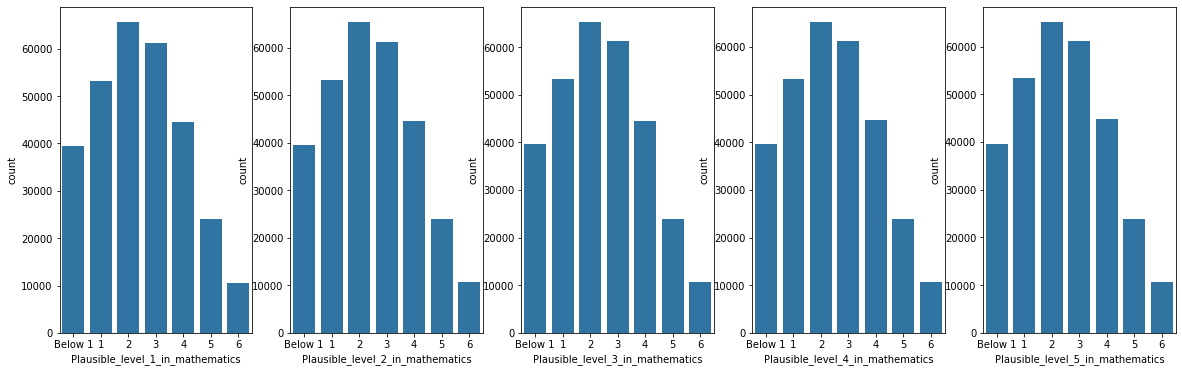

In [703]:
plt.figure(figsize=(20,6))

plt.subplot(1,5,1)
sb.countplot(clean_df.iloc[:,34], color=sb.color_palette()[0])

plt.subplot(1,5,2)
sb.countplot(clean_df.iloc[:,35], color=sb.color_palette()[0]);

plt.subplot(1,5,3)
sb.countplot(clean_df.iloc[:,36], color=sb.color_palette()[0]);

plt.subplot(1,5,4)
sb.countplot(clean_df.iloc[:,37], color=sb.color_palette()[0]);

plt.subplot(1,5,5)
sb.countplot(clean_df.iloc[:,38], color=sb.color_palette()[0]);


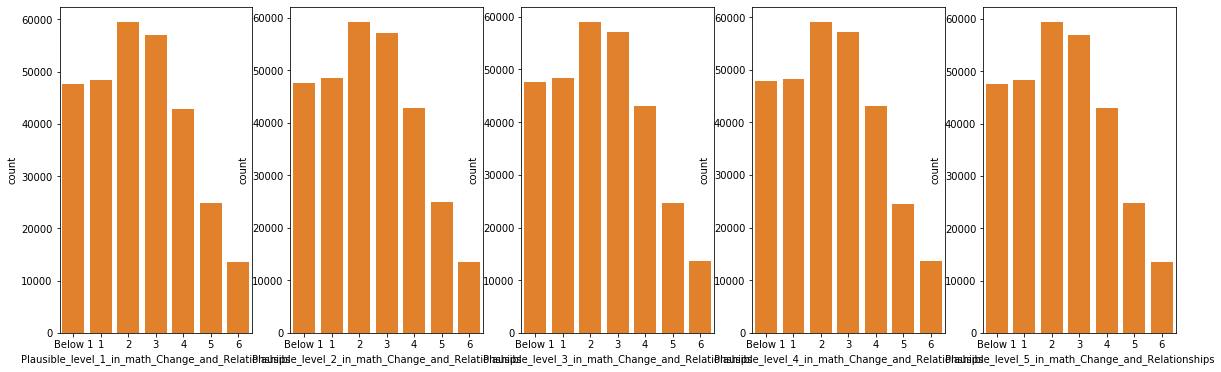

In [704]:
plt.figure(figsize=(20,6))

plt.subplot(1,5,1)
sb.countplot(clean_df.iloc[:,39], color=sb.color_palette()[1])

plt.subplot(1,5,2)
sb.countplot(clean_df.iloc[:,40], color=sb.color_palette()[1]);

plt.subplot(1,5,3)
sb.countplot(clean_df.iloc[:,41], color=sb.color_palette()[1]);

plt.subplot(1,5,4)
sb.countplot(clean_df.iloc[:,42], color=sb.color_palette()[1]);

plt.subplot(1,5,5)
sb.countplot(clean_df.iloc[:,43], color=sb.color_palette()[1]);

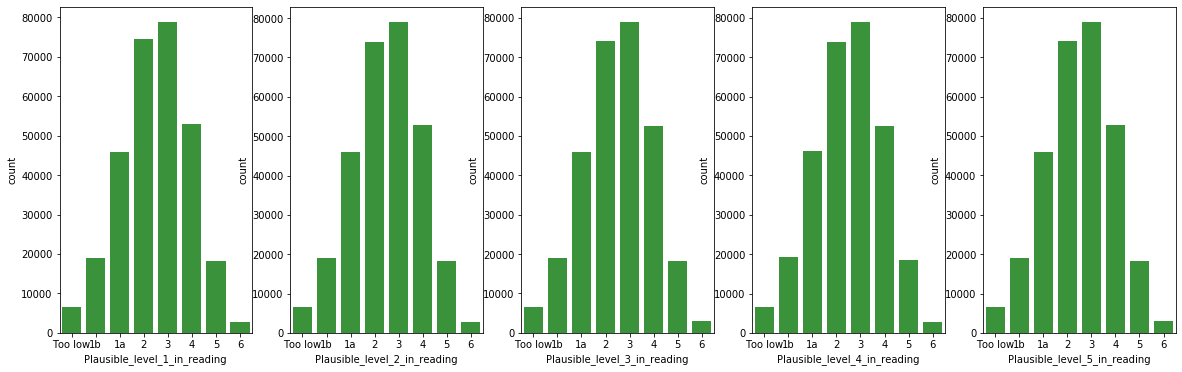

In [705]:
plt.figure(figsize=(20,6))

plt.subplot(1,5,1)
sb.countplot(clean_df.iloc[:,74], color=sb.color_palette()[2])

plt.subplot(1,5,2)
sb.countplot(clean_df.iloc[:,75], color=sb.color_palette()[2]);

plt.subplot(1,5,3)
sb.countplot(clean_df.iloc[:,76], color=sb.color_palette()[2]);

plt.subplot(1,5,4)
sb.countplot(clean_df.iloc[:,77], color=sb.color_palette()[2]);

plt.subplot(1,5,5)
sb.countplot(clean_df.iloc[:,78], color=sb.color_palette()[2]);

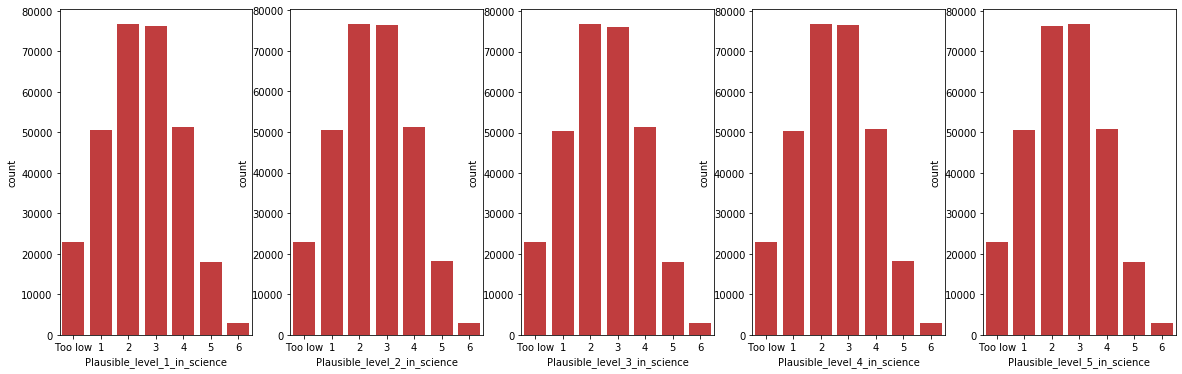

In [706]:
plt.figure(figsize=(20,6))

plt.subplot(1,5,1)
sb.countplot(clean_df.iloc[:,79], color=sb.color_palette()[3])

plt.subplot(1,5,2)
sb.countplot(clean_df.iloc[:,80], color=sb.color_palette()[3]);

plt.subplot(1,5,3)
sb.countplot(clean_df.iloc[:,81], color=sb.color_palette()[3]);

plt.subplot(1,5,4)
sb.countplot(clean_df.iloc[:,82], color=sb.color_palette()[3]);

plt.subplot(1,5,5)
sb.countplot(clean_df.iloc[:,83], color=sb.color_palette()[3]);

They all look very alike in each scale and subscale. I'll keep just the first column of every scale/subscale

In [707]:
# drop all the plausible levels 2 to 5
clean_df = clean_df.filter(regex=r'(^(?!Plausible_level_[2-5]_).*)')

In [708]:
clean_df.shape

(298594, 44)

In [709]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298594 entries, 0 to 309871
Data columns (total 44 columns):
Country                                                                      298594 non-null object
OECD_country                                                                 298594 non-null object
Student_ID                                                                   298594 non-null object
Gender                                                                       298594 non-null object
Mother_Highest_Schooling                                                     280683 non-null category
Mother_Current_Job_Status                                                    288071 non-null object
Father_Highest_Schooling                                                     271374 non-null category
Father_Current_Job_Status                                                    278630 non-null object
Country_of_Birth_International_Self                                          293039 n

Having a look above, the columns for
- Language_of_the_test
- Plausible_level_1_in_mathematics
- Plausible_level_1_in_science
- Standard_or_simplified_set_of_booklets
- Country
- OECD_country
- Student_ID
- Gender

are all complete (298594 non-null).

---

All other columns are incomplete

**Plausible level in reading only contains 233762 non null**, and it is a variable I'm definitely planning to use.
Other possible limitations are given by
- Index_of_economic_social_and_cultural_status: 294289 non-null
- Language_at_home_(3_digit_code): 296565 non-null

Moreover, the math subscales as well are not complete (could it depend on the fact that student scoring lower did't complete all test items? Or on the booklet rotation system? I could not find the answer in the Thecnical report).


Since we have already seen them..

#### The plausible values

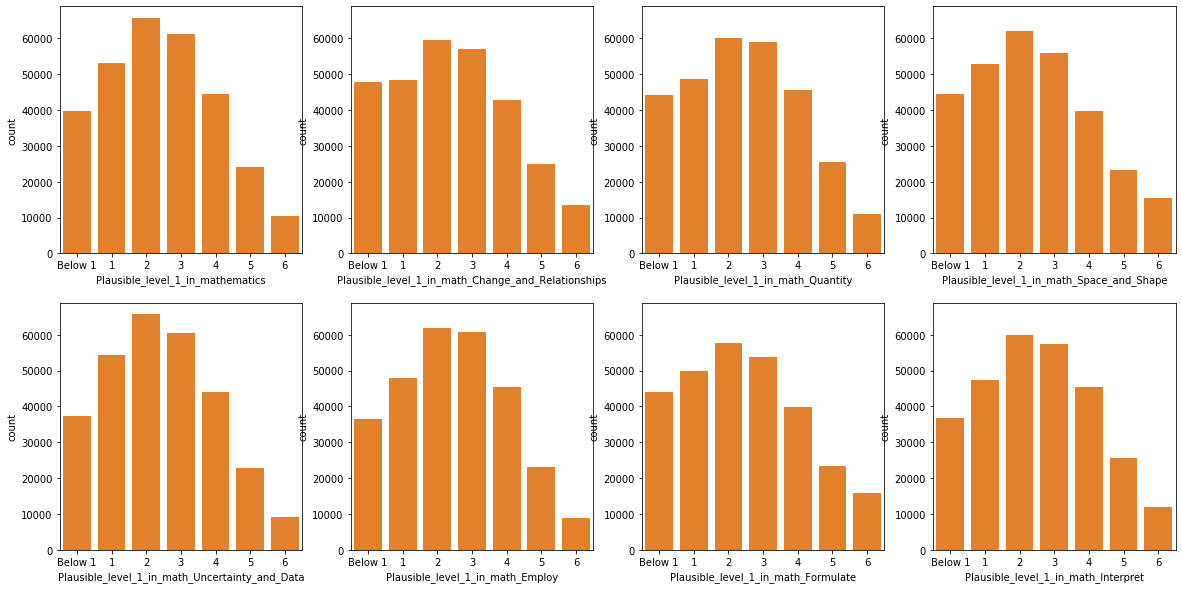

In [710]:

plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
ax1 = sb.countplot(clean_df.iloc[:,34], color=sb.color_palette()[1])
plt.subplot(2,4,2)
ax2 = sb.countplot(clean_df.iloc[:,35], color=sb.color_palette()[1])
plt.ylim(ax1.get_ylim());
plt.subplot(2,4,3)
ax3 = sb.countplot(clean_df.iloc[:,36], color=sb.color_palette()[1])
plt.ylim(ax1.get_ylim());
plt.subplot(2,4,4)
ax4 = sb.countplot(clean_df.iloc[:,37], color=sb.color_palette()[1])
plt.ylim(ax1.get_ylim());
plt.subplot(2,4,5)
ax5 = sb.countplot(clean_df.iloc[:,38], color=sb.color_palette()[1])
plt.ylim(ax1.get_ylim());
plt.subplot(2,4,6)
ax6 = sb.countplot(clean_df.iloc[:,39], color=sb.color_palette()[1])
plt.ylim(ax1.get_ylim());
plt.subplot(2,4,7)
ax7 = sb.countplot(clean_df.iloc[:,40], color=sb.color_palette()[1])
plt.ylim(ax1.get_ylim());
plt.subplot(2,4,8)
ax8 = sb.countplot(clean_df.iloc[:,41], color=sb.color_palette()[1]);
plt.ylim(ax1.get_ylim());


Distribution of the student in the math scale and subscales is unimodal, slightly right-skewed, with the majority of student in the levels 2 and 3, followed by 1 and below_1, and lastly 4, 5, 6.

The distribution of the subscale Uncertainty_and_Data is almost identical to the one of the main mathematical scale (first plot). The other subscale vary to different degrees.

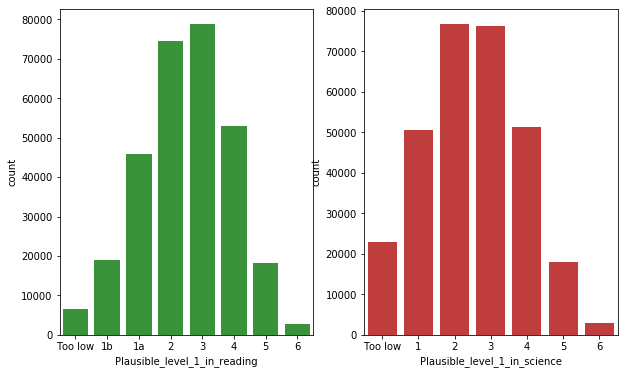

In [711]:
# reading and science NB: plotted together just for convenience
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sb.countplot(clean_df.iloc[:,42], color=sb.color_palette()[2]);

plt.subplot(1,2,2)
sb.countplot(clean_df.iloc[:,43], color=sb.color_palette()[3]);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!